
# Week 10 — Relationships & Modeling

**Course:** DATS 2102 · Data Visualization for Data Science  

**Dataset:** Boston Housing (MASS via `statsmodels`)  
> Note: `sklearn.datasets.load_boston()` is **deprecated** due to ethical concerns. We use the public MASS *Boston* dataset via `statsmodels` for educational purposes.


## Environment setup

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

sns.set_theme()


In [2]:
# Load Boston Housing data from MASS via statsmodels
boston = sm.datasets.get_rdataset("Boston", "MASS").data
df = boston.rename(columns=str.lower)

# Quick peek
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2



### Variables (subset)

- **medv**: Median value of owner-occupied homes ($1000s)  
- **rm**: Average number of rooms per dwelling  
- **lstat**: % lower status of the population  
- **chas**: Charles River dummy (1 if tract bounds river)  
- **nox**: Nitric oxides concentration (parts per 10 million)  
- **ptratio**: Pupil–teacher ratio by town  


## scatterplot

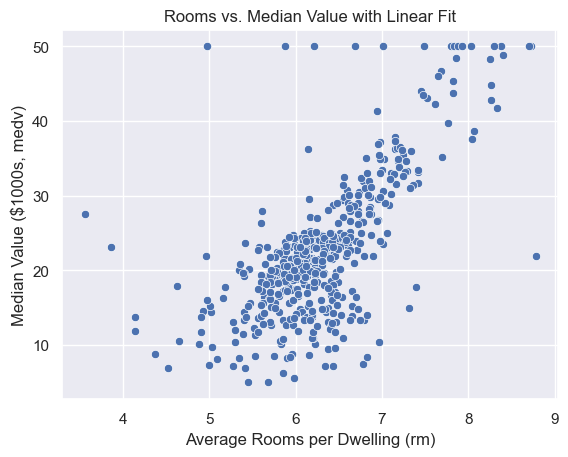

In [13]:
sns.scatterplot(data=df, x="rm", y="medv")
plt.title("Rooms vs. Median Value with Linear Fit")
plt.xlabel("Average Rooms per Dwelling (rm)")
plt.ylabel("Median Value ($1000s, medv)")
plt.show()

## Basic scatter + marginal histograms
`jointplot` combines a **bivariate plot** in the center (joint) with **marginal distributions** along axes.

Text(0.5, 1.02, 'Rooms vs Median Value — scatter + marginal hist')

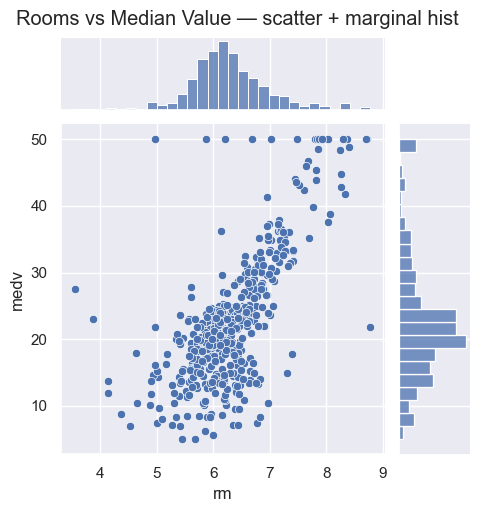

In [ ]:
g = sns.jointplot(
    data=df, x="rm", y="medv",
    kind="scatter", height=5, ratio=4, space=0.2
)
g.fig.suptitle("Rooms vs Median Value — scatter + marginal hist", y=1.02)

## Scatterplot with regression line (rooms vs. value)

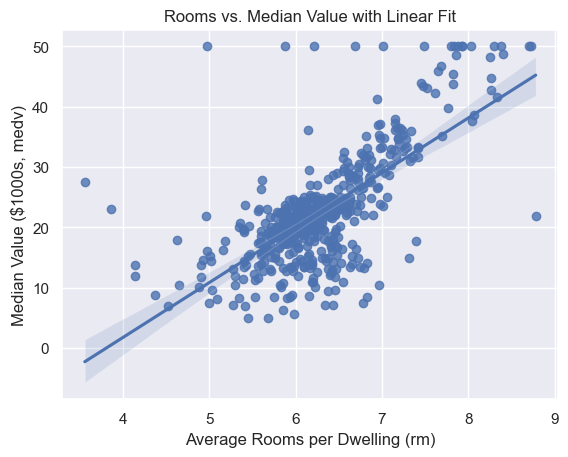

In [ ]:
sns.regplot(data=df, x="rm", y="medv")
plt.title("Rooms vs. Median Value with Linear Fit")
plt.xlabel("Average Rooms per Dwelling (rm)")
plt.ylabel("Median Value ($1000s, medv)")
plt.show()

## Scatter with regression line (and 95% CI)


Text(0.5, 1.02, 'Rooms vs Median Value — regression with CI')

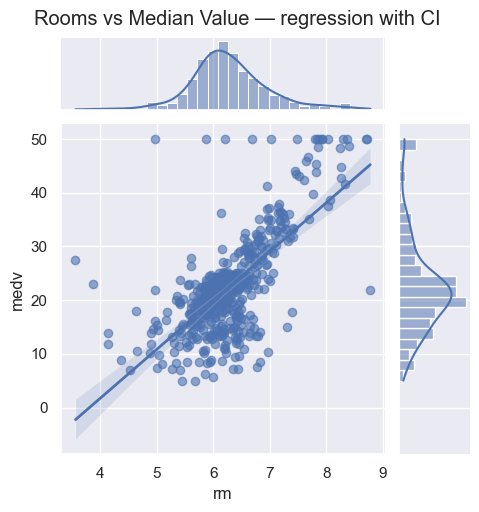

In [27]:
g = sns.jointplot(
    data=df, x="rm", y="medv",
    kind="reg", height=5, ratio=4, space=0.2,
    joint_kws={"line_kws": {"linewidth":2}, "scatter_kws": {"alpha":0.6}}
)
g.fig.suptitle("Rooms vs Median Value — regression with CI", y=1.02)

## Multivariate visualization using hue/facet
 'chas' is a 0/1 indicator for tracts along the Charles River

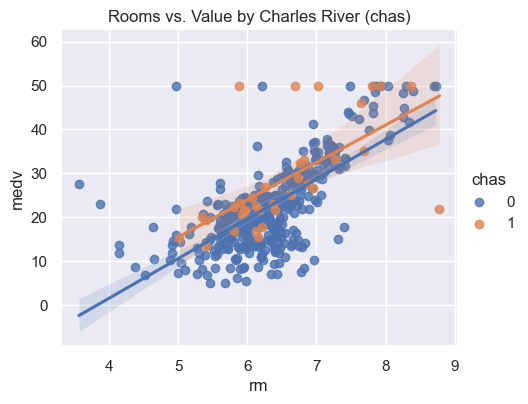

In [ ]:
sns.lmplot(data=df, x="rm", y="medv", hue="chas", height=4, aspect=1.2)
plt.title("Rooms vs. Value by Charles River (chas)")
plt.show()

## Correlation matrix heatmap

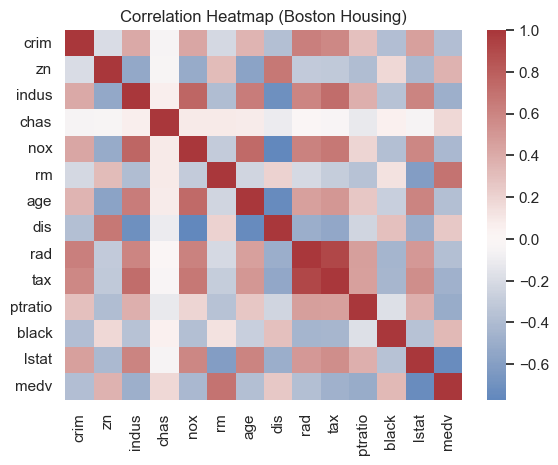

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="vlag", center=0)
plt.title("Correlation Heatmap (Boston Housing)")
plt.show()

## OLS: medv ~ rm

In [ ]:
X = sm.add_constant(df["rm"])
y = df["medv"]
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           2.49e-74
Time:                        00:33:06   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

## Residuals diagnostics

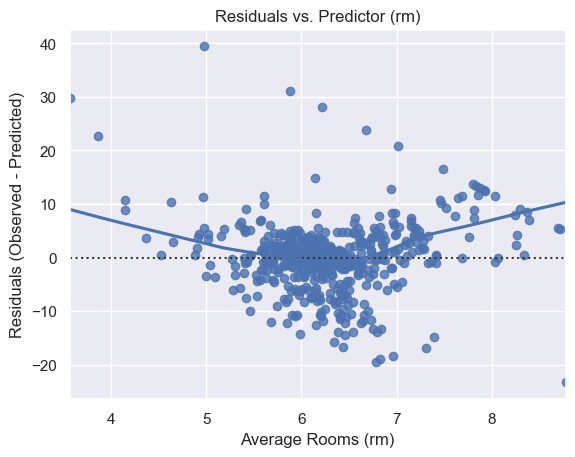

In [ ]:
sns.residplot(x=df["rm"], y=df["medv"], lowess=True)
plt.title("Residuals vs. Predictor (rm)")
plt.xlabel("Average Rooms (rm)")
plt.ylabel("Residuals (Observed - Predicted)")
plt.show()

## Predicted vs Actual

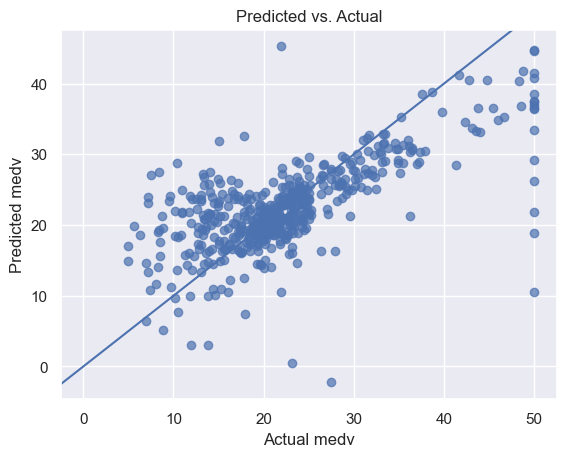

In [ ]:
X = sm.add_constant(df["rm"])
y = df["medv"]
model = sm.OLS(y, X).fit()
pred = model.predict(X)

plt.figure()
plt.scatter(y, pred, alpha=0.7)
plt.xlabel("Actual medv")
plt.ylabel("Predicted medv")
plt.title("Predicted vs. Actual")
plt.axline((0,0), slope=1)
plt.show()

## Nonlinear relationship example (quadratic)


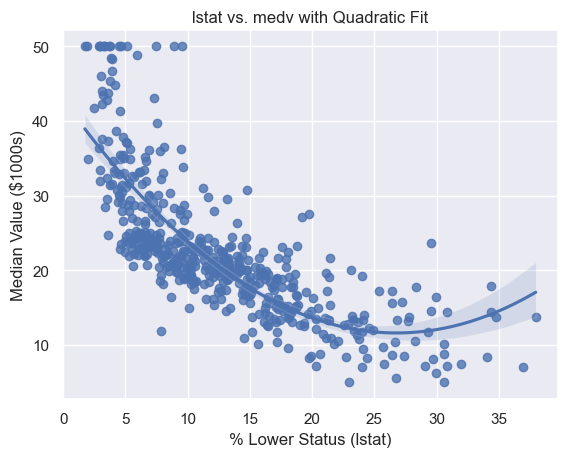

In [ ]:
sns.regplot(data=df, x="lstat", y="medv", order=2)
plt.title("lstat vs. medv with Quadratic Fit")
plt.xlabel("% Lower Status (lstat)")
plt.ylabel("Median Value ($1000s)")
plt.show()

## Q–Q plot (normality of residuals)

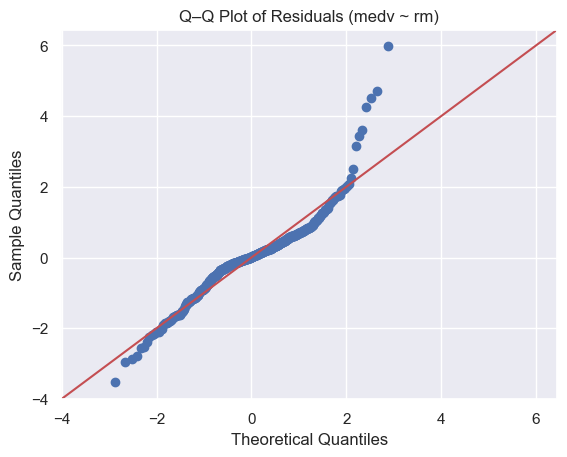

In [28]:
sm.qqplot(resid, line="45", fit=True)
plt.title("Q–Q Plot of Residuals (medv ~ rm)")
plt.show()


## Residual histogram (shape/symmetry)

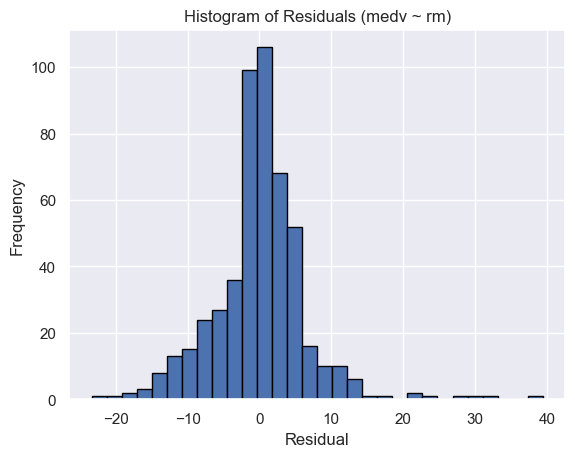

In [19]:
plt.hist(resid, bins=30, edgecolor="black")
plt.title("Histogram of Residuals (medv ~ rm)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()


## Heteroscedasticity

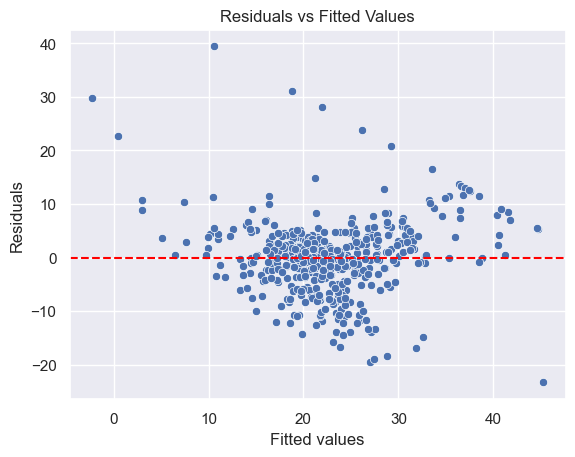

In [ ]:
import seaborn as sns

fitted_vals = model.fittedvalues
residuals = model.resid

sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()



## Locally Weighted Scatterplot Smoothing (LOWESS) guide line on residuals vs. fitted

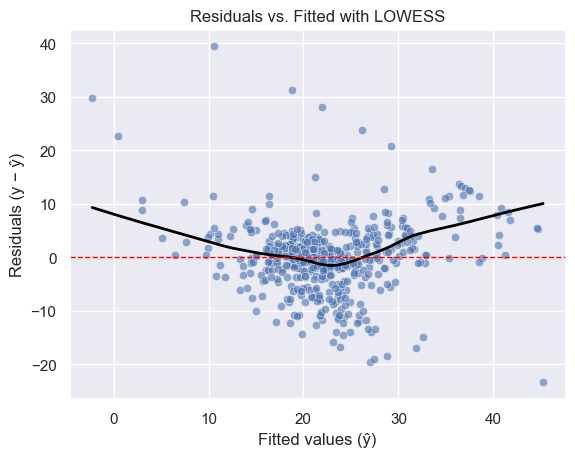

In [21]:
from statsmodels.nonparametric.smoothers_lowess import lowess

sns.scatterplot(x=fitted, y=resid, alpha=0.6)
lo = lowess(resid, fitted, frac=0.6)
plt.plot(lo[:,0], lo[:,1], color="black", linewidth=2)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title("Residuals vs. Fitted with LOWESS")
plt.xlabel("Fitted values (ŷ)")
plt.ylabel("Residuals (y − ŷ)")
plt.show()



## Good vs. Bad Visual Practices

- ✅ Clear labels, units, readable scales; show uncertainty bands where appropriate  
- ✅ Use facets or hue for subgroup comparisons; avoid overplotting  
- ❌ Truncate axes to exaggerate effects  
- ❌ Draw overly complex or overfit trendlines without justification  



## Reflection

1. Do residual plots suggest nonlinearity or heteroscedasticity?  
2. Which transformations or alternative fits could improve model adequacy?  
3. For your project dataset, add one regression visualization and one diagnostic plot. Summarize what you learn.
